In [3]:
!pip install pyquaternion
from pyquaternion import Quaternion
import numpy as np

w, l, h = 1.862, 4.923, 1.588

# Önce, yönlendirilmemiş bir kutu oluşturun
# Kutunun köşe noktalarını bulmak için WLH değerlerini kullanın

half_width = w / 2
half_length = l / 2
half_height = h / 2

corners_local = np.array([
    [half_width, -half_length, -half_height],
    [half_width, half_length, -half_height],
    [-half_width, half_length, -half_height],
    [-half_width, -half_length, -half_height],
    [half_width, -half_length, half_height],
    [half_width, half_length, half_height],
    [-half_width, half_length, half_height],
    [-half_width, -half_length, half_height]
])

# Ardından, yönlendirmeyi kullanarak koordinat sistemi dönüşünü yapın

orientation = Quaternion(-0.5062799396024005, -0.5248600459609233, -0.48687125878507587, 0.4807899045104026)

# Oryantasyon matrisini oluşturun
rotation_matrix = orientation.rotation_matrix

# Köşeleri döndürün
corners_global = np.dot(rotation_matrix, corners_local.T).T

print(corners_global)


[[-2.38784494  0.84894721 -1.06473678]
 [ 2.52485176  0.78359931 -0.75317659]
 [ 2.40643807  0.73844585  1.10450567]
 [-2.50625863  0.80379376  0.79294548]
 [-2.40643807 -0.73844585 -1.10450567]
 [ 2.50625863 -0.80379376 -0.79294548]
 [ 2.38784494 -0.84894721  1.06473678]
 [-2.52485176 -0.78359931  0.75317659]]


In [9]:

# Given box dimensions
w, l, h = 1.862, 4.923, 1.588

# Create an unoriented box skeleton
half_width = w / 2
half_length = l / 2
half_height = h / 2

corners_local = np.array([
    [half_width, -half_length, -half_height],
    [half_width, half_length, -half_height],
    [-half_width, half_length, -half_height],
    [-half_width, -half_length, -half_height],
    [half_width, -half_length, half_height],
    [half_width, half_length, half_height],
    [-half_width, half_length, half_height],
    [-half_width, -half_length, half_height]
])

# Given orientation values
orientation_values = (-0.5062799396024005, -0.5248600459609233, -0.48687125878507587, 0.4807899045104026)

# Create a Quaternion from orientation values
orientation = Quaternion(orientation_values)

# Get rotation matrix from the Quaternion
rotation_matrix = orientation.rotation_matrix

# Apply rotation matrix to the box skeleton
corners_global = np.dot(rotation_matrix, corners_local.T).T

# Print the resulting corners
print(corners_global)


[[-2.38784494  0.84894721 -1.06473678]
 [ 2.52485176  0.78359931 -0.75317659]
 [ 2.40643807  0.73844585  1.10450567]
 [-2.50625863  0.80379376  0.79294548]
 [-2.40643807 -0.73844585 -1.10450567]
 [ 2.50625863 -0.80379376 -0.79294548]
 [ 2.38784494 -0.84894721  1.06473678]
 [-2.52485176 -0.78359931  0.75317659]]


In [10]:
# Given center values
center_values = np.array([8.42937612, 0.28193626, 19.50056707])

# Add center values to the rotated skeleton box
corners_final = corners_global + center_values

# Print the resulting corners
print(corners_final)


[[ 6.04153118  1.13088347 18.43583029]
 [10.95422788  1.06553557 18.74739048]
 [10.83581419  1.02038211 20.60507274]
 [ 5.92311749  1.08573002 20.29351255]
 [ 6.02293805 -0.45650959 18.3960614 ]
 [10.93563475 -0.5218575  18.70762159]
 [10.81722106 -0.56701095 20.56530385]
 [ 5.90452436 -0.50166305 20.25374366]]


In [11]:
# Filter corners that fall in front of the camera based on the x-coordinate
front_corners = corners_final[corners_final[:, 0] > 0]

# Print the corners in front of the camera
print(front_corners)


[[ 6.04153118  1.13088347 18.43583029]
 [10.95422788  1.06553557 18.74739048]
 [10.83581419  1.02038211 20.60507274]
 [ 5.92311749  1.08573002 20.29351255]
 [ 6.02293805 -0.45650959 18.3960614 ]
 [10.93563475 -0.5218575  18.70762159]
 [10.81722106 -0.56701095 20.56530385]
 [ 5.90452436 -0.50166305 20.25374366]]


In [13]:
# Given intrinsic matrix
intrinsic = np.array([[554.7729, 0.0000, 355.5060],
                      [0.0000, 554.7729, 77.9471],
                      [0.0000, 0.0000, 1.0000]])

# Add a fourth value (one) to the corners
homogenous_corners = np.hstack((corners_final, np.ones((corners_final.shape[0], 1))))

# Expand the intrinsic matrix by adding a fourth diagonal element (one)
expanded_intrinsic = np.hstack((intrinsic, np.zeros((3, 1))))
expanded_intrinsic = np.vstack((expanded_intrinsic, np.array([0.0, 0.0, 0.0, 1.0])))

# Apply the expanded intrinsic matrix to the homogenous coordinates
pixel_coords_homogenous = np.dot(expanded_intrinsic, homogenous_corners.T).T

# Normalize the depth using Zc
pixel_coords_homogenous_normalized = pixel_coords_homogenous[:, :2] / pixel_coords_homogenous[:, 2, None]

# Convert the pixel coordinates to a list of lists
pixel_coords = pixel_coords_homogenous_normalized[:, :2].tolist()

# Print the resulting pixel coordinates
print(pixel_coords)


[[537.3083771086469, 111.97776158117242], [679.6635820157234, 109.4784353277254], [647.2504718801418, 105.41996315356499], [517.4289327366122, 107.62819084108715], [537.1406843779278, 64.18006884470196], [679.8013024925015, 62.47146111137532], [647.313071936866, 62.651322667949515], [517.2375869166926, 64.20598293257203]]


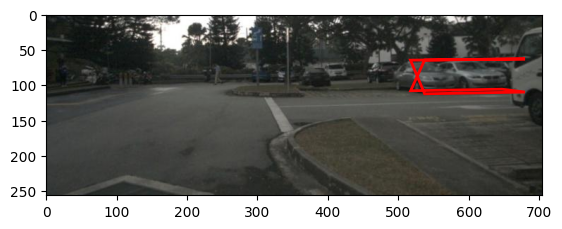

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Given image size
image_size = (704, 256)

# Create a figure and axis
fig, ax = plt.subplots()

# Load the image (replace 'your_image_path.jpg' with the actual path to the image)
# Example: image = plt.imread('your_image_path.jpg')
# Note: Make sure to use the correct path to the image file
image = plt.imread('SampleImageForQ1.jpg')

# Display the image
ax.imshow(image)

# Create a Polygon patch for the 3D box
polygon = Polygon(pixel_coords, edgecolor='r', linewidth=2, facecolor='none')

# Add the polygon patch to the axis
ax.add_patch(polygon)

# Set axis limits based on image size
ax.set_xlim(0, image_size[0])
ax.set_ylim(image_size[1], 0)

# Show the plot
plt.show()


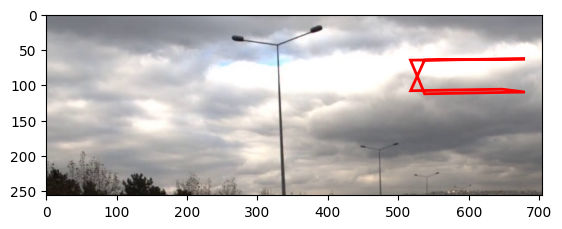

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Given image size
image_size = (704, 256)

# Create a figure and axis
fig, ax = plt.subplots()

# Load the image (replace 'your_image_path.jpg' with the actual path to the image)
# Example: image = plt.imread('your_image_path.jpg')
# Note: Make sure to use the correct path to the image file
image = plt.imread('track2_01776.png')

# Display the image
ax.imshow(image)

# Create a Polygon patch for the 3D box
polygon = Polygon(pixel_coords, edgecolor='r', linewidth=2, facecolor='none')

# Add the polygon patch to the axis
ax.add_patch(polygon)

# Set axis limits based on image size
ax.set_xlim(0, image_size[0])
ax.set_ylim(image_size[1], 0)

# Show the plot
plt.show()


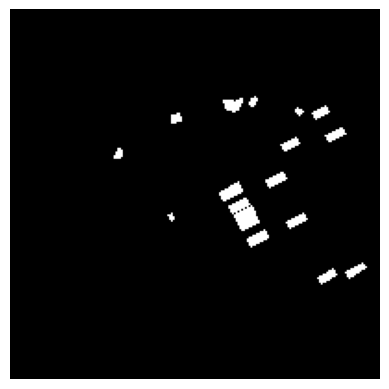

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

corners = [[[147.3599, 88.41841],[149.07516, 91.72386],[140.33578, 96.258934],[138.62051, 92.95348]],
 [[179.60852, 64.29594],[181.17125, 67.41203],[172.26811, 71.87698],[170.70538, 68.76089]],
 [[127.89769, 102.03726],[129.68773, 105.51345],[120.61231, 110.186775],[118.82227, 106.71059]],
 [[131.41325, 49.97424],[132.17775, 51.757256],[130.03445, 52.676224],[129.26996, 50.893208]],
 [[137.24602, 119.49097],[139.21143, 123.000046],[130.20926, 128.0421],[128.24385, 124.53302]],
 [[154.66882, 69.71],[156.23405, 72.71476],[148.08537, 76.959564],[146.52014, 73.9548]],
 [[125.044815, 48.534336],[125.76974, 50.73817],[123.35313, 51.53308],[122.628204, 49.329247]],
 [[190.54558, 137.06067],[192.2558, 139.98997],[183.64925, 145.01476],[181.93903, 142.08545]],
 [[57.35522, 77.61097],[60.306564, 78.26349],[59.65405, 80.67119],[56.702705, 80.01867]],
 [[120.15974, 51.055397],[120.88466, 53.25923],[118.46805, 54.054142],[117.743126, 51.850307]],
 [[158.39612, 110.31277],[160.16019, 113.574265],[151.33093, 118.34979],[149.56686, 115.088295]],
 [[130.57106, 106.96196],[132.55612, 110.81688],[123.66384, 115.3959],[121.67878, 111.54098]],
 [[132.38393, 111.434074],[134.22066, 115.000946],[125.74801, 119.36387],[123.91128, 115.797]],
 [[170.89825, 52.257988],[172.52678, 55.007957],[165.12012, 59.394165],[163.4916, 56.644196]],
 [[123.87072, 93.96434],[125.96968, 98.03731],[115.67436, 103.342896],[113.5754, 99.26993]],
 [[118.20914, 49.171043],[118.93406, 51.37488],[116.51745, 52.169792],[115.79253, 49.965954]],
 [[91.478386, 56.867043],[92.315735, 60.09624],[87.94819, 61.228767],[87.11084, 57.99957]],
 [[155.76213, 53.128166],[158.39238, 55.06765],[156.64993, 57.43069],[154.01968, 55.491207]],
 [[123.10843, 51.881073],[123.81528, 54.3249],[120.49535, 55.285145],[119.788506, 52.841316]],
 [[118.95078, 51.3608],[119.79005, 53.523678],[117.41834, 54.443977],[116.57908, 52.2811]],
 [[58.966488, 75.72214],[60.848633, 76.6661],[59.90467, 79.432846],[58.022526, 78.488884]],
 [[120.81418, 49.110092],[121.5391, 51.313927],[119.12248, 52.108837],[118.39756, 49.905003]],
 [[122.430756, 50.79391],[123.15568, 52.99775],[120.73906, 53.79266],[120.01414, 51.58882]],
 [[87.32801, 110.66721],[88.79201, 113.92981],[87.14611, 114.66836],[85.68211, 111.40576]],
 [[174.05562, 140.42532],[176.10846, 143.70598],[168.48918, 148.47366],[166.43634, 145.19301]],
 [[132.59267, 47.301083],[133.78093, 49.59566],[131.8167, 50.612858],[130.62843, 48.31828]],
 [[123.58936, 50.724785],[124.314285, 52.928623],[121.89767, 53.723534],[121.172745, 51.519695]]]

bev_image = np.zeros((200, 200, 3), dtype=np.uint8)

# Draw the boxes on the image using cv2.fillPoly
for box_corners in corners:
    box_corners_np = np.array(box_corners, dtype=np.int32)
    cv2.fillPoly(bev_image, [box_corners_np], color=(255, 255, 255))

# Visualize the image
plt.imshow(bev_image)
plt.axis('off')
plt.show()


In [20]:
import numpy as np

# Given BEV space dimensions
bev_space_dimensions = (200, 200, 8)

# Create a mesh grid for all possible BEV locations
x_values = np.linspace(0, bev_space_dimensions[0] - 1, bev_space_dimensions[0])
y_values = np.linspace(0, bev_space_dimensions[1] - 1, bev_space_dimensions[1])
z_values = np.linspace(0, bev_space_dimensions[2] - 1, bev_space_dimensions[2])

# Create the mesh grid
geometry = np.array(np.meshgrid(x_values, y_values, z_values)).T.reshape(-1, 3)

# Print the resulting geometry
print(geometry)


[[  0.   0.   0.]
 [  0.   1.   0.]
 [  0.   2.   0.]
 ...
 [199. 197.   7.]
 [199. 198.   7.]
 [199. 199.   7.]]


In [26]:
import torch
intrinsics = torch.tensor([[[559.9431,   0.0000, 363.7108],
           [  0.0000, 559.9431,  71.0907],
           [  0.0000,   0.0000,   1.0000]],
          [[557.2236,   0.0000, 359.1575],
           [  0.0000, 557.2236,  76.2631],
           [  0.0000,   0.0000,   1.0000]],
          [[554.7729,   0.0000, 355.5060],
           [  0.0000, 554.7729,  77.9471],
           [  0.0000,   0.0000,   1.0000]],
          [[552.9662,   0.0000, 348.5295],
           [  0.0000, 552.9662,  76.8213],
           [  0.0000,   0.0000,   1.0000]],
          [[356.0573,   0.0000, 364.8566],
           [  0.0000, 356.0573,  71.9825],
           [  0.0000,   0.0000,   1.0000]],
          [[554.1861,   0.0000, 355.1913],
           [  0.0000, 554.1861,  80.5262],
           [  0.0000,   0.0000,   1.0000]]])
cam_to_world = torch.tensor([[[ 8.2921e-01, -2.5122e-03,  5.5893e-01,  1.3484e+00],
           [-5.5883e-01,  1.5382e-02,  8.2914e-01,  4.9868e-01],
           [-1.0680e-02, -9.9988e-01,  1.1351e-02,  1.5123e+00],
           [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
          [[ 1.8063e-02, -7.6936e-03,  9.9981e-01,  1.5633e+00],
           [-9.9977e-01,  1.1219e-02,  1.8149e-02,  1.8701e-02],
           [-1.1356e-02, -9.9991e-01, -7.4892e-03,  1.5078e+00],
           [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
          [[-8.2756e-01, -2.1789e-03,  5.6137e-01,  1.4501e+00],
           [-5.6120e-01,  2.8457e-02, -8.2719e-01, -4.9622e-01],
           [-1.4172e-02, -9.9959e-01, -2.4772e-02,  1.4867e+00],
           [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
          [[ 9.4780e-01,  6.8945e-03, -3.1880e-01,  1.0392e+00],
           [ 3.1882e-01, -1.9892e-03,  9.4781e-01,  4.6560e-01],
           [ 5.9005e-03, -9.9997e-01, -4.0835e-03,  1.5948e+00],
           [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
          [[-1.1401e-03, -1.8604e-02, -9.9983e-01, -7.8487e-03],
           [ 9.9997e-01,  7.9896e-03, -1.2889e-03, -1.5122e-02],
           [ 8.0122e-03, -9.9980e-01,  1.8595e-02,  1.5790e+00],
           [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
          [[-9.3728e-01,  1.3844e-02, -3.4831e-01,  9.4331e-01],
           [ 3.4855e-01,  2.3516e-02, -9.3699e-01, -4.9179e-01],
           [-4.7807e-03, -9.9963e-01, -2.6866e-02,  1.5546e+00],
           [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]])
extrinsics = torch.inverse(cam_to_world)
world_to_bevimg = torch.tensor([[[ 0.0000, -2.0000,  0.0000, 99.5000],
           [-2.0000,  0.0000,  0.0000, 99.5000],
           [ 0.0000,  0.0000,  1.0,  4.5],
           [ 0.0000,  0.0000,  0.0000,  1.0000]]])
world_to_bevimg = world_to_bevimg.repeat(6, 1, 1)
bevimg_to_word = torch.inverse(world_to_bevimg)

# Convert NumPy array to PyTorch tensor
geometry_tensor = torch.tensor(geometry, dtype=torch.float32)

# Transform BEV coordinates to image coordinates
bev_coords_homogeneous = torch.cat((geometry_tensor, torch.ones((geometry_tensor.shape[0], 1), dtype=torch.float32)), dim=1)

# Apply world_to_bevimg transformation
bevimg_coords_homogeneous = torch.matmul(world_to_bevimg, bev_coords_homogeneous.T).T

# Convert from 4D homogeneous coordinates to 3D coordinates
bevimg_coords = bevimg_coords_homogeneous[:, :3] / bevimg_coords_homogeneous[:, 3, None]

# Apply extrinsics transformation
world_coords_homogeneous = torch.matmul(bevimg_to_word, bev_coords_homogeneous.T).T
world_coords = world_coords_homogeneous[:, :3] / world_coords_homogeneous[:, 3, None]

# Apply intrinsics transformation
image_coords_homogeneous = torch.matmul(intrinsics, world_coords.T).T
image_coords = image_coords_homogeneous[:, :2] / image_coords_homogeneous[:, 2, None]

# Check which BEV coordinates are in front of each camera
valid_masks = []
for i in range(6):
    # Check if the BEV coordinates are in front of the camera
    valid_mask = (world_coords[:, 2] > 0) & (image_coords[:, 0] >= 0) & (image_coords[:, 0] < 200) & (image_coords[:, 1] >= 0) & (image_coords[:, 1] < 200)
    valid_masks.append(valid_mask)

# Print the transformed coordinates and valid masks
print("Transformed BEV coordinates:\n", world_coords)
print("Valid masks for each camera:\n", valid_masks)

Transformed BEV coordinates:
 tensor([[[ 49.7500,  49.7500,  49.7500,  49.7500,  49.7500,  49.7500],
         [ 49.7500,  49.7500,  49.7500,  49.7500,  49.7500,  49.7500],
         [ -4.5000,  -4.5000,  -4.5000,  -4.5000,  -4.5000,  -4.5000]],

        [[ 49.2500,  49.2500,  49.2500,  49.2500,  49.2500,  49.2500],
         [ 49.7500,  49.7500,  49.7500,  49.7500,  49.7500,  49.7500],
         [ -4.5000,  -4.5000,  -4.5000,  -4.5000,  -4.5000,  -4.5000]],

        [[ 48.7500,  48.7500,  48.7500,  48.7500,  48.7500,  48.7500],
         [ 49.7500,  49.7500,  49.7500,  49.7500,  49.7500,  49.7500],
         [ -4.5000,  -4.5000,  -4.5000,  -4.5000,  -4.5000,  -4.5000]],

        ...,

        [[-48.7500, -48.7500, -48.7500, -48.7500, -48.7500, -48.7500],
         [-49.7500, -49.7500, -49.7500, -49.7500, -49.7500, -49.7500],
         [  2.5000,   2.5000,   2.5000,   2.5000,   2.5000,   2.5000]],

        [[-49.2500, -49.2500, -49.2500, -49.2500, -49.2500, -49.2500],
         [-49.7500, -49.7

In [32]:
import torch
import matplotlib.pyplot as plt

# Image shape
image_shape = (704, 256)

# Create an empty tensor for visualization
sampling_points_visualization = torch.zeros((len(valid_masks), image_shape[0], image_shape[1]))

# Fill valid coordinates with ones
for i in range(len(valid_masks)):
    valid_coords = torch.nonzero(valid_masks[i])
    print(f"Camera {i+1} - Valid Coordinates Shape: {valid_coords.shape}")
    print(f"Camera {i+1} - Min Index: {valid_coords.min(0)[0]}")
    print(f"Camera {i+1} - Max Index: {valid_coords.max(0)[0]}")


Camera 1 - Valid Coordinates Shape: torch.Size([38, 2])
Camera 1 - Min Index: tensor([259901,      0])
Camera 1 - Max Index: tensor([300104,      5])
Camera 2 - Valid Coordinates Shape: torch.Size([38, 2])
Camera 2 - Min Index: tensor([259901,      0])
Camera 2 - Max Index: tensor([300104,      5])
Camera 3 - Valid Coordinates Shape: torch.Size([38, 2])
Camera 3 - Min Index: tensor([259901,      0])
Camera 3 - Max Index: tensor([300104,      5])
Camera 4 - Valid Coordinates Shape: torch.Size([38, 2])
Camera 4 - Min Index: tensor([259901,      0])
Camera 4 - Max Index: tensor([300104,      5])
Camera 5 - Valid Coordinates Shape: torch.Size([38, 2])
Camera 5 - Min Index: tensor([259901,      0])
Camera 5 - Max Index: tensor([300104,      5])
Camera 6 - Valid Coordinates Shape: torch.Size([38, 2])
Camera 6 - Min Index: tensor([259901,      0])
Camera 6 - Max Index: tensor([300104,      5])
